In [1]:
import whisper

small_model = whisper.load_model("./whisper-models/small.pt")
base_model = whisper.load_model("./whisper-models/base.pt")
tiny_model = whisper.load_model("./whisper-models/tiny.pt")

/Users/valarpiraichandran/dev/env/lib/python3.12/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_locatio

In [2]:
from pytubefix import YouTube

# Sample YouTube Video
# https://www.youtube.com/watch?v=yYt_psQXvEM

def download_audio(url):
    # Reading the above Taken movie Youtube link
    data = YouTube(url)
    # Converting and downloading as 'MP4' file
    audio = data.streams.get_audio_only()
    file_name = audio.download(output_path="audios/")
    print("Audio Downloaded \"", file_name, "\"")
    return file_name

In [3]:
from IPython.display import YouTubeVideo
from urllib.parse import urlparse
from urllib.parse import parse_qs

video_id="yYt_psQXvEM"

def display_video(url):
    # https://www.youtube.com/watch?v=yYt_psQXvEM
    global video_id
    parsed_url = urlparse(url)
    video_id = parse_qs(parsed_url.query)['v'][0]
    print(video_id)

def now():
    from time import gmtime, strftime
    print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))


In [4]:
import gradio as gr

def generate_transcription(model_name="tiny", url=""):
    print(url, model_name)
    display_video(url)
    print("Download started..")
    now()
    downloaded_file = download_audio(url)
    print("Speech Recognition started..")
    now()
    if model_name == "base":
        model = base_model
    elif model_name == "small":
        model = small_model
    else:
        model = tiny_model
    result = model.transcribe(downloaded_file, fp16=False)
    print("Completed..")
    print(result["text"])
    now()
    return result["text"]

demo = gr.Interface(fn=generate_transcription, 
                    inputs=[
                        gr.Radio(["tiny", "base", "small"], value="tiny"),
                        gr.Textbox(label="Youtube video URL", value="https://www.youtube.com/watch?v=yYt_psQXvEM")
                    ], outputs=gr.Textbox(lines=15, placeholder="Speech to text content..."))
    
if __name__ == "__main__":
    demo.launch(show_api=False)

/Users/valarpiraichandran/dev/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade.
--------


yYt_psQXvEM


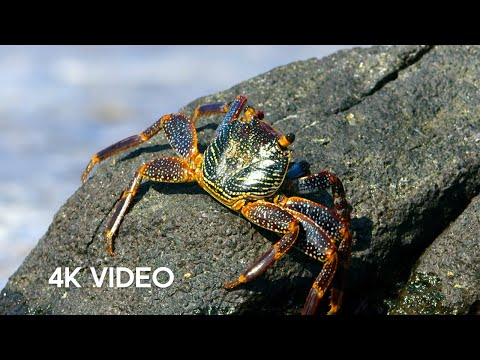

https://www.youtube.com/watch?v=yYt_psQXvEM tiny
yYt_psQXvEM
Download started..
2024-10-03 10:17:09
Audio Downloaded " /Users/valarpiraichandran/dev/expr/llama-learning/audios/Crab vs Eel vs Octopus  4K UHD  Blue Planet II  BBC Earth.mp4 "
Speech Recognition started..
2024-10-03 10:17:09
Completed..
 A sunny light-foot crab. One of thousands of shore crabs just waiting for their moment. Every day they gather on the tropical shores of Brazil. Waking for the tide to go out. Which exposes their feeding grounds. See-weed covered rocks, a hundred metres from the shore. Getting there is a race against the tide. They leap from rock to rock. They leap from rock to rock. These crabs seem to be afraid of the water. The West is tensed and covered by water. The Arson archaeologist orphan is at the young auger and the Japanese are all present five years. The Moray eel. The chain Moray is a specialist crab hunter. Its blunt teeth can easily grip and crush a crab shell. It's the crabs deadliest enemy

In [5]:
print(video_id)
YouTubeVideo(video_id, width=800, height=500)